In [4]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# 1. Carica l'immagine in scala di grigi
img = cv2.imread('../1-126.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Applica la DWT (Discrete Wavelet Transform)
coeffs = pywt.dwt2(img, 'haar')  # Puoi usare altre wavelet come 'db1', 'sym2', etc.
cA, (cH, cV, cD) = coeffs  # cA = Approssimazione, cH = Dettaglio orizzontale, cV = Dettaglio verticale, cD = Dettaglio diagonale

# 3. Imposta una soglia per i dettagli
threshold = 30  # Soglia di esempio, puoi modificarla in base all'immagine
cH = pywt.threshold(cH, threshold, mode='soft')
cV = pywt.threshold(cV, threshold, mode='soft')
cD = pywt.threshold(cD, threshold, mode='soft')

# 4. Ricostruisci l'immagine
coeffs = (cA, (cH, cV, cD))
img_denoised = pywt.idwt2(coeffs, 'haar')

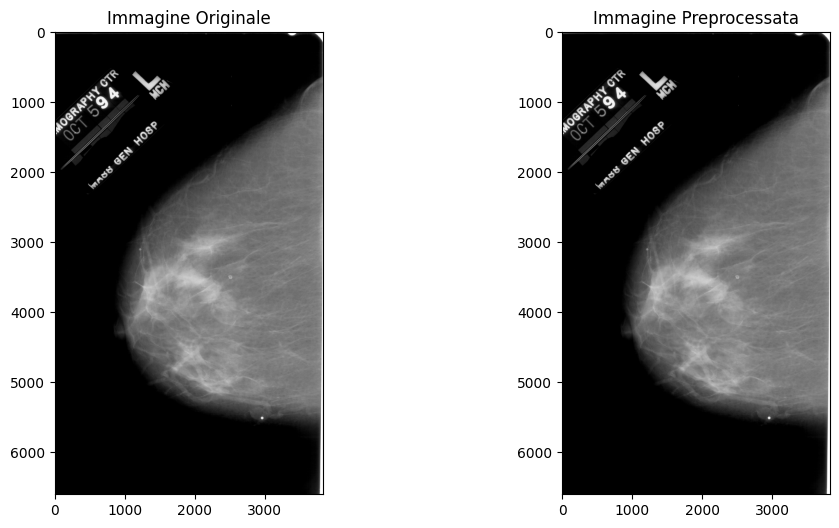

In [7]:

# 5. Visualizza l'immagine originale e quella preprocessata
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Immagine Originale")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Immagine Preprocessata")
plt.imshow(img_denoised, cmap='gray')
plt.show()